# Hito 1: Tokyo Olympics 2020 Tweets

Integrantes: Felipe Araneda, Alexander Cuevas, Ignacio Díaz, Felipe Maldonado, Millaray Valdivia.

Curso: Introducción a la Minería de Datos CC5206

Fecha: 28 de Septiembre, 2021



##Introducción

Los Juegos Olímpicos son el mayor evento deportivo del mundo, incluyendo múltiples disciplinas y del cual participan atletas procedentes de todo los países y naciones. A mediados del 2021 se realizaron los **"Juegos Olímpicos de Tokyo 2020"**, con un año de retraso debido a la delicada situación sanitaria por la pandemia por COVID-19, y a pesar de que el virus no ha sido completamente erradicado, los avances médicos han abierto la posibilidad de poder realizar los eventos siguiendo protocolos sanitarios y promoviendo el apoyo a los atletas de forma remota.

Este tipo de mega eventos mundiales suelen generar un gran impacto en las redes sociales, donde millones de personas alrededor del mundo comentan sobre el desarrollo del evento, sus expectativas y el desempeño de los distintos atletas. Sin embargo, durante esta version de los juegos las interacciones por estos medios aumentaron de forma considerable respecto a otros años, y es que la situación excepcional del evento ha generado grandes limitaciones para prestar apoyo de forma presencial a los atletas, siendo las redes sociales la única forma de apoyarlos.

Debido a los mencionado anteriormente, para este reporte se presenta una exploración de datos de un dataset de **"Tweets sobre los Juegos Olímpicos de Tokyo 2020"**, el cual fue obtenido mediante la página web [Kaggle](https://www.kaggle.com/gpreda/tokyo-olympics-2020-tweets), y cuyos datos fueron recolectados mediante la API de Twitter, usando la librería *Tweepy* y filtrando para obtener tweets relacionados al tópico **#Tokyo2020**. 

La exploración de datos que se realizará en este reporte incluye un reconocimiento de los datos y sus características, limpieza de las inconsistencias y visualización de los datos. Mediante esta exploración se busca responder preguntas como: cuáles fueron los tópicos más populares, si se pueden agrupar las opiniones similares o cómo cambian estas consideraciones con el desarrollo del evento.

##Exploración de Datos

In [ ]:
#@title Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

!pip install emoji --upgrade
import emoji
# Mejor visualización de las tablas
%load_ext google.colab.data_table

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
#@title Cargar el dataset
# Cargar el dataset
dataset_file = 'tokyo_2020_tweets.csv'
dataset = pd.read_csv(dataset_file)
# Ver las primeras filas del dataset
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [ ]:
#@title Información inicial Dataset
# Dimensiones del dataset
print("Dimensiones: filas = " + str(dataset.shape[0]) + ", columnas = " + str(dataset.shape[1]) + "\n")

# Columnas del dataset
print("Nombres Columnas: " + dataset.columns[0], end="")
for col in dataset.columns[1:]:
  print(", " + col, end="")

Dimensiones: filas = 297011, columnas = 16

Nombres Columnas: id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet

In [ ]:
#@title Tipos de las columnas
dataset.dtypes

id                   object
user_name            object
user_location        object
user_description     object
user_created         object
user_followers       object
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
retweets            float64
favorites           float64
is_retweet           object
dtype: object

In [ ]:
#@title Descripción inicial del dataset 
dataset.describe()

,retweets,favorites
count,160525.000000,160525.000000
mean,2.518629,14.132372
std,43.109598,149.978699
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,6429.000000,14382.000000


In [ ]:
#@title Chequear NaN por columnas
dataset.isna().sum()

id                       0
user_name           131073
user_location       169095
user_description    139700
user_created        136479
user_followers      136479
user_friends        136480
user_favourites     136480
user_verified       136482
date                136480
text                136480
hashtags            173983
source              136481
retweets            136486
favorites           136486
is_retweet          136486
dtype: int64

## Limpieza de Datos
Como muestran las celdas anteriores, existían varios tipos que no fueron reconocidas al cargar el dataset con pandas y que tampoco se podían forzar. Luego, al ver cómo se reparten los NaN, se da cuenta que hay muchos datos incosistentes que están mal agregados a la base de datos. 

Para limpiar estos datos se eliminan los NaN en ciertas columnas clave y luego se vuelve a mirar la repartición de NaN, para finalmente forzar los tipos que deberían corresponder a las columnas.

In [ ]:
#@title Botamos las filas que tengan algún NaN en ciertas columnas con datos inconsistentes, para que queden así:
dataset = dataset.dropna(subset=['user_verified', 'source', 'retweets', 'favorites', 'is_retweet'])
# Chequear cuántas
dataset.isna().sum()

id                      0
user_name               0
user_location       38021
user_description     8627
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            37502
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
#@title Dimensiones del dataset luego de borrar los datos inconsistentes (NaN)
print("Dimensiones (datos limpiados): filas = " + str(dataset.shape[0]) + ", columnas = " + str(dataset.shape[1]) + "\n")


Dimensiones (datos limpiados): filas = 160525, columnas = 16



In [ ]:
#@title Sin los datos inconsistentes, podemos redefinir los tipos de las columnas
dataset['id'] = dataset['id'].astype('int64')
dataset['user_created'] = dataset['user_created'].astype('datetime64')
dataset['user_followers'] = dataset['user_followers'].astype('int32')
dataset['user_friends'] = dataset['user_friends'].astype('int32')
dataset['user_favourites'] = dataset['user_favourites'].astype('int32')
dataset['user_verified'] = dataset['user_verified'].astype('bool')
dataset['date'] = dataset['date'].astype('datetime64')
dataset['retweets'] = dataset['retweets'].astype('int32')
dataset['favorites'] = dataset['favorites'].astype('int32')
dataset['is_retweet'] = dataset['is_retweet'].astype('bool')

In [ ]:
#@title Tipos luego de la redefinición
dataset.dtypes

id                           int64
user_name                   object
user_location               object
user_description            object
user_created        datetime64[ns]
user_followers               int32
user_friends                 int32
user_favourites              int32
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
retweets                     int32
favorites                    int32
is_retweet                    bool
dtype: object

In [ ]:
#@title Descripción del dataset luego de la redefinición de tipos
dataset.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.605250e+05,1.605250e+05,160525.000000,1.605250e+05,160525.000000,160525.000000
mean,1.419441e+18,1.417768e+05,1183.568391,1.902304e+04,2.518629,14.132372
std,3.208010e+14,1.529727e+06,4073.352622,4.669014e+04,43.109598,149.978699
min,1.418859e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.419211e+18,1.580000e+02,188.000000,7.370000e+02,0.000000,0.000000
50%,1.419480e+18,6.850000e+02,526.000000,4.404000e+03,0.000000,1.000000
75%,1.419674e+18,3.677000e+03,1211.000000,1.679400e+04,0.000000,3.000000
max,1.419960e+18,5.420659e+07,461566.000000,2.234721e+06,6429.000000,14382.000000


In [ ]:
dataset.describe(include=["object"])

,user_name,user_location,user_description,text,hashtags,source
count,160525,122504,151898,160525,123023,160525
unique,63917,21888,61212,159074,36222,285
top,canadianbestseller.com,India,https://t.co/ZJK4Q3dy6l – Your Prime Discount ...,#Tokyo2020 #Boxing \n\n#TeamIndia 's #MaryKom ...,['Tokyo2020'],Twitter for Android
freq,755,4688,755,9,30962,53042


In [ ]:
dataset.describe(include=["datetime"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_created,date
count,160525,160525
unique,66334,105600
top,2019-10-26 02:56:57,2021-07-27 05:00:00
freq,755,22
first,2006-09-04 00:18:12,2021-07-24 09:03:12
last,2021-07-27 08:58:07,2021-07-27 09:58:16


In [ ]:
dataset.describe(include=["bool"])

,user_verified,is_retweet
count,160525,160525
unique,2,1
top,False,False
freq,82721,160525


In [ ]:
print(dataset['user_verified'].value_counts(normalize=True))
print()
print(dataset['is_retweet'].value_counts(normalize=True))

False    0.515315
True     0.484685
Name: user_verified, dtype: float64

False    1.0
Name: is_retweet, dtype: float64


In [ ]:
#@title Botamos columnas que tienen poca o nada variación de datos (is_retweet, retweets, favorites)
dataset_clean = dataset.drop(['is_retweet', 'retweets', 'favorites'], axis=1)
dataset_clean.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone


In [ ]:
#@title Tweets relacionados a Chile
chile_tweets = dataset_clean[dataset_clean['text'].str.contains("Chile|Chilean|chile|chilean", na=False) | dataset_clean['user_location'].str.contains("Chile|chile", na=False)]
chile_tweets.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
95,1418889035032969224,#Tokyo2020,Worldwide 🌐🌎,Sports Diplomat🤵|| Business Consultant💼|| Inte...,2015-10-17 12:24:14,11466,195,3512,True,2021-07-24 11:01:22,FT: Chile 🇨🇱 1-2 Canada 🇨🇦 \n\n✌️Beckie’s doub...,['TeamCanada'],Twitter for iPhone
422,1418887769162756103,Doble Enganche,NaN,Cuenta 100% futbolera 📱Tratamos de poner infor...,2021-05-01 22:50:39,61,99,116,False,2021-07-24 10:56:20,Fecha 2 del fútbol femenino en los #JuegosOlim...,['JuegosOlimpicos'],Twitter Web App
526,1418887388013674506,SwimSwam Live,On Deck,The official Live Tweeting arm of @swimswamnew...,2015-02-16 16:11:58,15941,114,362,False,2021-07-24 10:54:49,Eduardo Cisternas takes heat 1 of the men's 40...,['Tokyo2020'],Twitter Web App
847,1418886262413533187,kasur empuk,west of westeros,Embrace your weirdness,2014-08-02 16:03:16,1269,470,19726,False,2021-07-24 10:50:21,Watching swimming rn and wow chile #Tokyo2020,['Tokyo2020'],Twitter for Android


In [ ]:
#@title Tweets creados el mismo día que su usuario
tweets_same_day = dataset_clean[dataset_clean['user_created'].dt.date == dataset_clean['date'].dt.date]
tweets_same_day.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
67,1418889126858919938,anon69,NaN,jus a sk8r grrrrrrrrrrrllllllll //////,2021-07-24 10:47:24,1,0,0,False,2021-07-24 11:01:44,#Tokyo2020 \n\nWhere’s porridge? https://t.co/...,['Tokyo2020'],Twitter for iPhone
225,1418888595956437001,AmazingNews,NaN,It's amazing...,2021-07-24 10:45:12,0,6,5,False,2021-07-24 10:59:37,🤔\nWow look at this\nhttps://t.co/9nq8UgF6nA\n...,"['Tokyo2020', 'sport', 'sports', 'medals', 'Tr...",Twitter Web App
232,1418888547881431048,anon69,NaN,jus a sk8r grrrrrrrrrrrllllllll //////,2021-07-24 10:47:24,1,0,0,False,2021-07-24 10:59:26,#Tokyo2020 \nSome sick hair in opening ceremon...,"['Tokyo2020', 'channel7']",Twitter for iPhone
262,1418888442499457030,anon69,NaN,jus a sk8r grrrrrrrrrrrllllllll //////,2021-07-24 10:47:24,1,0,0,False,2021-07-24 10:59:01,#Tokyo2020 \n\nThe opening ceremony was alright,['Tokyo2020'],Twitter for iPhone


In [ ]:
#@title Usuarios verificados ordenados por suma de favoritos en tweets
users_ver_fav = dataset[dataset['user_verified'] == True].groupby(["user_name"], dropna=True).sum().sort_values(by=['favorites'], ascending=False)['favorites']
users_ver_fav.head(10)

user_name
Badminton Talk          93097.0
BBC Sport               87506.0
#Tokyo2020              63887.0
Olympics                60123.0
Rappler                 56274.0
#Tokyo2020 for India    45324.0
ABS-CBN News            42710.0
Gretchen Ho             39686.0
Team GB                 33778.0
Devin Heroux            33486.0
Name: favorites, dtype: float64

In [ ]:
#@title Tweets relacionados a la pandemia
cv_tweets = dataset_clean[dataset_clean['text'].str.contains("Covid|covid|Pandemic|pandemic|COVID|Corona|corona|Virus|virus", na=False)]
cv_tweets.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
233,1418888542697132032,Muhit,World,Now: Senior Officer - Foreign Embassy | Ex: EU...,2015-11-04 17:01:19,685,4995,20253,False,2021-07-24 10:59:24,#BREAKING \n\n100 #TeamUSA members have not be...,"['BREAKING', 'TeamUSA', 'Tokyo2020']",Twitter Web App
279,1418888385436000259,Gaelen ☘️,VIP 👉🏻,"Bestower of good fortune, atp bettor, grinder,...",2021-02-05 17:32:47,2321,70,4522,False,2021-07-24 10:58:47,@paraplas5 Bro this covid stuff is ruining a l...,NaN,Twitter for iPad
420,1418887781099651088,One News Page,"New York, USA",One News Page: The world's trusted news portal...,2008-12-27 10:08:12,1975,855,223,False,2021-07-24 10:56:23,Pandemic-hit Tokyo Olympics open in low-key ce...,"['Tokyo2020', 'Olympics']",Twitter Web App
636,1418887009444237314,BEPOP浅草,NaN,This is the shop of japaneese character stuff....,2021-06-25 05:36:56,0,0,11,False,2021-07-24 10:53:19,Which country do you cheer up ？\n#Olympics #To...,"['Olympics', 'Tokyo2020', 'Covid_19', 'asakusa']",Twitter for Android


In [ ]:
#@title Tweets que hablan de feminismo o relacionado
feminism_tweets = dataset_clean[dataset_clean['text'].str.contains("feminism|Feminism|Gender-Equal|gender-equal|sexualized|sexualisation|sexualization|sexist|sexism|Women Empowerment|women empowerment", na=False)]
feminism_tweets.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107,88,102,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android
7238,1418866240290914304,Shree Hari Raam,NaN,NaN,2020-06-02 11:53:28,13,230,739,False,2021-07-24 09:30:47,"Witness the real Women Empowerment, feminism!\...","['MirabaiChanu', 'Tokyo2020']",Twitter Web App
7429,1418865821355499523,Pooja Mutha,NaN,Engineer by choice \nCricket 🏏,2021-06-18 09:08:58,25,145,6861,False,2021-07-24 09:29:07,All I want to say \nThis is real Women Empower...,NaN,Twitter for Android
8217,1418863682424029185,Om Ratna 🕉🇮🇳,"Bihar, India",Nationalist \n ...,2019-03-03 10:46:32,286,1124,48688,False,2021-07-24 09:20:37,This is what real #Feminism looks like.😌❤ Cong...,"['Feminism', 'MirabaiChanu']",Twitter for Android


In [ ]:
#@title Tweets más retwitteados
dataset[['text', 'retweets']][dataset['retweets'] > 0].sort_values(by=['retweets'], ascending=False)

,text,retweets
145851,Preliminary - MD Group D\nMohammad Ahsan/Hendr...,6429
111971,GOLD FOR THE PHILIPPINES!!!\n\nBREAKING NEWS. ...,4917
91091,Preliminary - MD Group A\nMarcus Fernaldi Gide...,4690
115168,"Here’s Hidilyn Diaz, the first ever Philippine...",4113
25986,HISTORY FOR #BADMINTON INDONESIA\n\n7 - FOR TH...,4020
...,...,...
84885,Bhavani Devi - #Fencing \nMen's Team - #Archer...,1
84882,Margielyn Didal makes it to the finals! You ma...,1
84880,Matsuyama ready to begin gold medal quest at t...,1
11506,The motivational speeches of our #PrimeMiniste...,1


##Visualizacion de datos y otros 

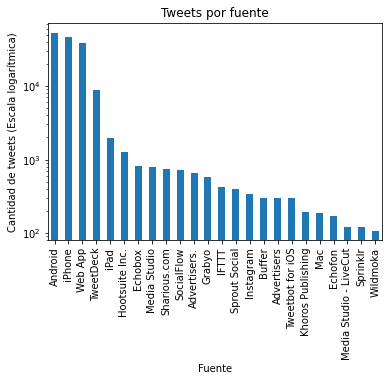

In [ ]:
#@title Cantidad de tweets (Escala logarítmica)
# Distribución de las fuentes de tweets
visual_data = dataset_clean
visual_data["source"] = visual_data["source"].str.replace("Advertisers.", "Advertisers").replace(r" - LiveCut", "", regex=True)
visual_data = dataset.groupby(["source"]).size()
visual_data = visual_data.sort_values(ascending=False).where(lambda x : x > 100).dropna()
visual_data = visual_data.rename(lambda x: x.replace("Twitter for ", "").replace("Twitter ", "").replace("Powered by ", ""))
visual_data.plot.bar(x="source", logy=True)
plt.ylabel("Cantidad de tweets (Escala logarítmica)")
plt.xlabel("Fuente")
plt.title("Tweets por fuente")
plt.show()

In [ ]:
new_data = dataset_clean.copy(True)

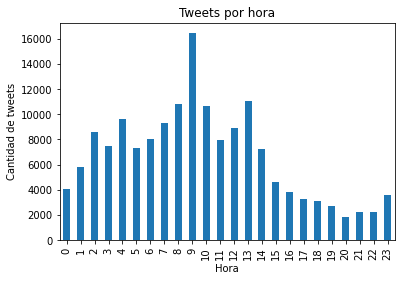

In [ ]:
#@title Tweets por hora
# Distribución de tweets por hora
visual_data = new_data.copy(True)
visual_data['date'] = pd.to_datetime(new_data['date'], errors='coerce').dt.hour.astype('Int64')
visual_data = visual_data.groupby(["date"]).size()
visual_data.plot.bar(x="date")
plt.ylabel("Cantidad de tweets")
plt.xlabel("Hora")
plt.title("Tweets por hora")
plt.show()

In [ ]:
#@title Emojis más comunes
visual_data = new_data.copy(True)

emoji_dict = {}

def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

def count_emojis(s):
  global emoji_dict
  for e in emoji.UNICODE_EMOJI['en']:
    if e in s:
      if e in emoji_dict:
        emoji_dict[e] += 1
      else:
        emoji_dict[e] = 1
  return s

#visual_data["text"] = visual_data["text"].astype('string').dropna().apply(extract_emojis)
#values = visual_data["text"].str.split(expand=True).stack().value_counts()

#visual_data["text"].astype('string').dropna().apply(count_emojis)
#emoji_dict

emojis = tweets.apply(lambda words: [word for word in words if word in emoji.UNICODE_EMOJI['en']])
counter = Counter()
emojis.apply(lambda x: counter.update(x))

emojis = pd.DataFrame(counter.most_common(20))
emojis.rename(columns={0:"Emoji", 1:"Count"}, inplace=True)
emojis

,Emoji,Count
0,🥇,2712
1,🇮🇳,1836
2,🥈,1549
3,🇺🇸,1145
4,🇯🇵,970
5,🇦🇺,902
6,🇬🇧,856
7,🇨🇦,852
8,🇵🇭,831
9,🔥,761


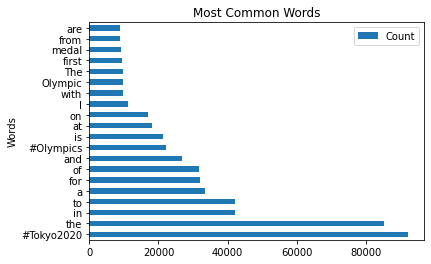

In [ ]:
#@title Most Common Words
from collections import Counter
common_words = pd.DataFrame(Counter(" ".join(dataset["text"]).split()).most_common(20))
common_words.rename(columns={0:"Words", 1:"Count"}, inplace=True)
common_words_plot = common_words.plot.barh(x='Words', y='Count', rot=0, title="Most Common Words")

In [ ]:
#@title Tokenizing

tweets = dataset['text']
tweets = tweets.apply(word_tokenize)
tweets.head()

0               [Let, the, party, begin, #, Tokyo2020]
1    [Congratulations, #, Tokyo2020, https, :, //t....
2    [Big, Breaking, Now, Tokyo, Olympic, Update, J...
3    [Q4, :, 🇬🇧3-1🇿🇦, Great, Britain, finally, find...
4    [All, I, can, think, of, every, time, I, watch...
Name: text, dtype: object

In [ ]:
#@title Removing Stopwords
stop = stopwords.words('english')
tweets_without_stopwords = tweets.apply(lambda words: [word for word in words if word not in stop])
tweets_without_stopwords.head(5)

0                    [Let, party, begin, #, Tokyo2020]
1    [Congratulations, #, Tokyo2020, https, :, //t....
2    [Big, Breaking, Now, Tokyo, Olympic, Update, J...
3    [Q4, :, 🇬🇧3-1🇿🇦, Great, Britain, finally, find...
4    [All, I, think, every, time, I, watch, rings, ...
Name: text, dtype: object

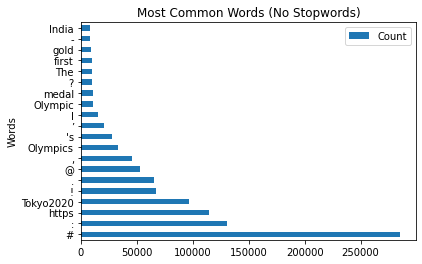

In [ ]:
#@title Most Common Words (No Stopwords)
counter = Counter()
tweets_without_stopwords.apply(lambda x: counter.update(x))

common_words_without_stopwords = pd.DataFrame(counter.most_common(20))
common_words_without_stopwords.rename(columns={0:"Words", 1:"Count"}, inplace=True)
common_words_without_stopwords_plot = common_words_without_stopwords.plot.barh(x='Words', y='Count', rot=0, title="Most Common Words (No Stopwords)")

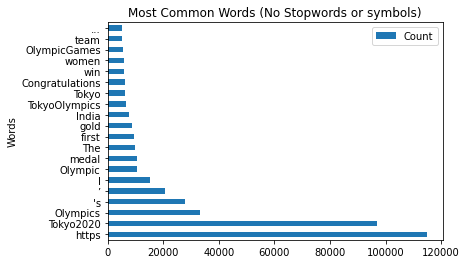

In [ ]:
#@title Most Common Tweets (No Stopwords or symbols)
symbols = ["?","#", ",", ".", "!", "'", "@", "-", ":", "{", "}", "|", "(", ")", ";", "¡", "&"] 
tweets_without_symbols = tweets_without_stopwords.apply(lambda words: [word for word in words if word not in symbols])
tweets_without_symbols

counter = Counter()
tweets_without_symbols.apply(lambda x: counter.update(x))

tweets_without_symbols = pd.DataFrame(counter.most_common(20))
tweets_without_symbols.rename(columns={0:"Words", 1:"Count"}, inplace=True)
tweets_without_symbols_plot = tweets_without_symbols.plot.barh(x='Words', y='Count', rot=0, title="Most Common Words (No Stopwords or symbols)")

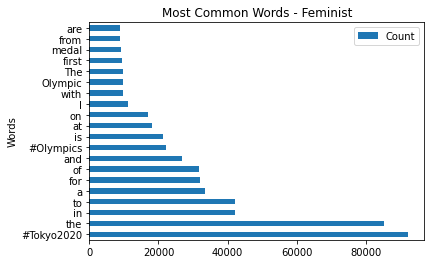

In [ ]:
#@title Most Common Words - Feminist
feminist_words = pd.DataFrame(Counter(" ".join(feminism_tweets["text"]).split()).most_common(20))
feminist_words.rename(columns={0:"Words", 1:"Count"}, inplace=True)
feminist_words = common_words.plot.barh(x='Words', y='Count', rot=0, title="Most Common Words - Feminist")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


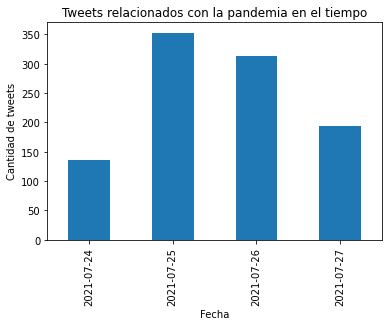

In [ ]:
#@title Tweets relacionados con la pandemia en el tiempo
cv_tweets['date'] = cv_tweets['date'].dt.date
cv_tweets = cv_tweets.groupby(cv_tweets['date']).size()
cv_tweets.plot.bar(x="date")
plt.ylabel("Cantidad de tweets")
plt.xlabel("Fecha")
plt.title("Tweets relacionados con la pandemia en el tiempo")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


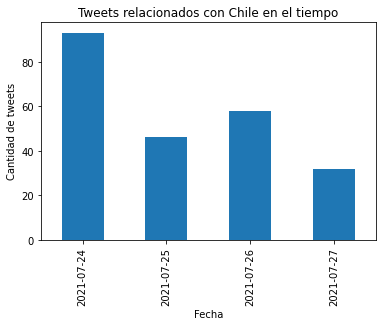

In [ ]:
#@title Tweets relacionados con Chile en el tiempo
chile_tweets['date'] = chile_tweets['date'].dt.date
chile_tweets = chile_tweets.groupby(chile_tweets['date']).size()
chile_tweets.plot.bar(x="date")
plt.ylabel("Cantidad de tweets")
plt.xlabel("Fecha")
plt.title("Tweets relacionados con Chile en el tiempo")
plt.show()

## Preguntas y Problemas

Para dar contexto a la acumulación y registro de datos en el campo deportivo se debe tener en cuenta que la industria del deporte utiliza el análisis deportivo para aumentar los ingresos, mejorar el rendimiento de los jugadores y la calidad de juego de un equipo, prevenir lesiones y muchas más mejoras. sin embargo, esto es posible mediante el analisis de dichos datos. Actualmente, los analistas deportivos tienen una gran demanda, ya sea por busqueda de mejores ventajas competitivas, mejoras de equipamiento tal de evitar lesiones, dar mejor publicidad y experiencia a los fanaticos, o servir de informacion para personas que realicen apuestas, por nombrar algunas de las utilidades que tienen las bases de datos deportivas.

En el caso de los tweets tenemos campos más relevantes como la hora de los tweets, la localizacion del usuario que escribió el tweet y la fuente de los tweets, luego se podría formular lo siguiente:

Preguntas:

1) ¿Cómo es, o son, la tendencia general de los tweets?

2) ¿Cómo es la evolución de las tendencias en el tiempo?

3) ¿Cuales son las tendencias por regiones o paises, y si son distintas a la tendencia global?

4) ¿Las tendencias varian según la fuente de los tweets?

5) ¿La diferencia horaria entre Japón y el mundo occidental juega un impacto en la cantidad de tweets?




## Participación

Felipe Araneda: Introducción, preguntas y problemas, preparación de la presentación y presentación.

Alexander Cuevas: Exploraciones iniciales y visualizaciones.

Ignacio Díaz: Introducción. Carga de datos, exploraciones iniciales, limpieza de datos. Tokenización, eliminación de stopwords y símbolos, visualizaciones.

Felipe Maldonado: Redacción de la introducción, preparación de la presentación (PPT), presentar y edición del video.

Millaray Valdivia: Visualizaciones y presentación.

In [ ]:
%%shell
jupyter nbconvert --to html /content/MineriaDatos_Hito1.ipynb

[NbConvertApp] Converting notebook /content/MineriaDatos_Hito1.ipynb to html
[NbConvertApp] Writing 503415 bytes to /content/MineriaDatos_Hito1.html
